<a href="https://colab.research.google.com/github/pranavrao87/Machine-Learning/blob/main/Neural%20Network%20Regression/01_neural_network_regression_w__tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression w/ neural networks in Tensorflow

Regression problem - predicting a numerical variable based on combination of inputs, essentially predicting a number

In [1]:
import tensorflow as tf
print(tf.__version__)

2.12.0


## Creating data to view and fit

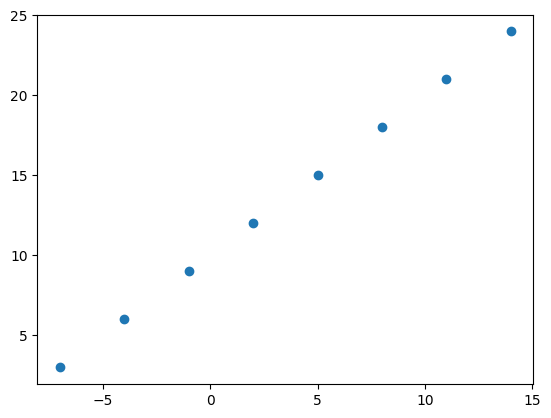

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features (input data)
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize
plt.scatter(X, y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
# Create demo tensor for hosuing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
X[1], y[1]

(-4.0, 6.0)

In [7]:
input_shape = X[0].shape # --> X[0] is a scalar!
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [8]:
# Turn NumPy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [9]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

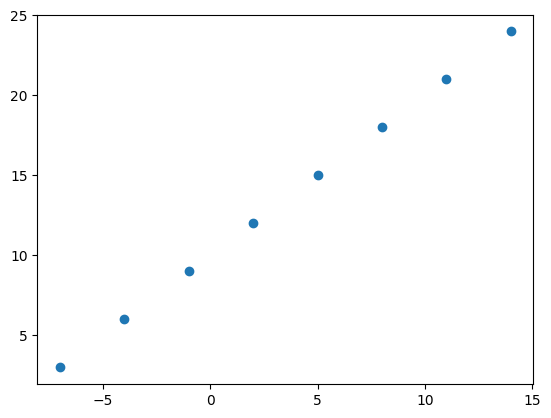

In [10]:
plt.scatter(X, y)

## Steps in modelling w/ TensorFlow

1.   **Creating a model** - define input and output layers, as well as the hidden layers of deep learning model.
2.   **Compiling a model** - define loss function (function which tells model how wrong it is) and the optimizer (tells model how to improve the patterns model is learning) and evaluation metrics (what to use to interpret the performance of model)
3.    **Fitting model** - letting model try to find patterns b/w X and y (features and labels)



In [11]:
# Set random seed
tf.random.set_seed(42)

# 1. Creating a model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model.compile(loss=tf.keras.losses.mae, #mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), #SGD - Stochastic gradient descent
              metrics=["mae"])

# 3. Fit model
model.fit(tf.expand_dims(X, -1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 8.9795 - mae: 8.9795
Epoch 2/5
1/1 [==============================] - 0s 19ms/step - loss: 8.8470 - mae: 8.8470
Epoch 3/5
1/1 [==============================] - 0s 14ms/step - loss: 8.7145 - mae: 8.7145
Epoch 4/5
1/1 [==============================] - 0s 20ms/step - loss: 8.5820 - mae: 8.5820
Epoch 5/5
1/1 [==============================] - 0s 32ms/step - loss: 8.4495 - mae: 8.4495


In [12]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
# Try and make prediction using model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 253ms/step


array([[24.981493]], dtype=float32)

In [14]:
y_pred + 11

array([[35.98149]], dtype=float32)

## Improve Model

Can improve model by altering steps taken to create model

1. **Creating a model** - add more layers, increase # of hidden layers, increase # of neurons/layer, change activation function of each layer
2. **Compiling a model** - change optimization function or **learning rate** of optmization function
3. **Fitting a model** - fit model for more epochs (increase epochs or give mode more data/examples)

In [15]:
# Rebuild model

# 1. Create model
tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit model (this time w/ inc. epochs or training time)
model.fit(tf.expand_dims(X, -1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 819ms/step - loss: 8.3170 - mae: 8.3170
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 8.1845 - mae: 8.1845
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 8.0520 - mae: 8.0520
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 7.9195 - mae: 7.9195
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 7.7870 - mae: 7.7870
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 7.6545 - mae: 7.6545
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 7.5220 - mae: 7.5220
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 7.4100 - mae: 7.4100
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 7.4044 - mae: 7.4044
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 7.3987 - mae: 7.3987
Epoch 11/100
1/1 [==============================] - 0s 12ms/step - lo

In [16]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [17]:
# Predict w/ improved model
model.predict([17.0])

1/1 [==============================] - 0s 112ms/step


array([[29.913988]], dtype=float32)

In [18]:
# Rebuild model

# 1. Create model 
tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

#2. Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

#3. Fit model
model.fit(tf.expand_dims(X, 1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 990ms/step - loss: 6.8869 - mae: 6.8869
Epoch 2/100
1/1 [==============================] - 0s 35ms/step - loss: 6.8861 - mae: 6.8861
Epoch 3/100
1/1 [==============================] - 0s 22ms/step - loss: 6.8854 - mae: 6.8854
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 6.8846 - mae: 6.8846
Epoch 5/100
1/1 [==============================] - 0s 21ms/step - loss: 6.8839 - mae: 6.8839
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 6.8831 - mae: 6.8831
Epoch 7/100
1/1 [==============================] - 0s 20ms/step - loss: 6.8824 - mae: 6.8824
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 6.8816 - mae: 6.8816
Epoch 9/100
1/1 [==============================] - 0s 20ms/step - loss: 6.8809 - mae: 6.8809
Epoch 10/100
1/1 [==============================] - 0s 19ms/step - loss: 6.8801 - mae: 6.8801
Epoch 11/100
1/1 [==============================] - 0s 14ms/step - l

In [19]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [20]:
# Predict w/ newer model
model.predict([17.0])

1/1 [==============================] - 0s 97ms/step


array([[30.013987]], dtype=float32)

## Evaluating a model

Build model --> fit model --> evaluate it --> tweak model --> Repeat...

Visualizing is very important:
- The data: what does data look like?
- The model - what does model look like?
- The training of a model- how does model perform while it learns?
- The predictions of the model - how does the model's predictions line up w/ original labels or expected outcomes

In [21]:
 # Make bigger dataset
 X = tf.range(-100, 100, 4)
 X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [22]:
# Make labels for dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

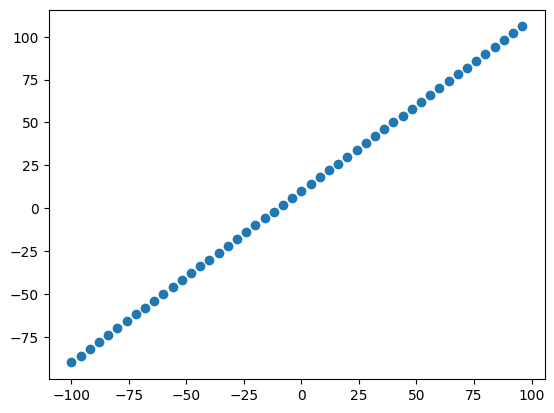

In [23]:
# Visualize data

import matplotlib.pyplot as plt
plt.scatter(X, y)

### The 3 sets: 

- **Training set** - model learns from data, typically 70-80% of total data available
- **Validation set** - model is tuned based on this data, 10-15% of available data
- **Test set** - model is evaluated on data to test what it has learned, typically 10-15% of total available data

In [24]:
# Check length of num of samples
len(X)

50

In [25]:
# Split data into test and train sets
X_train = X[:40] # first 40 training samples(80% of total data)
y_train = y[:40]

X_test = X[40:] # last testing samples (20% of total data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing data in newly created training and test sets


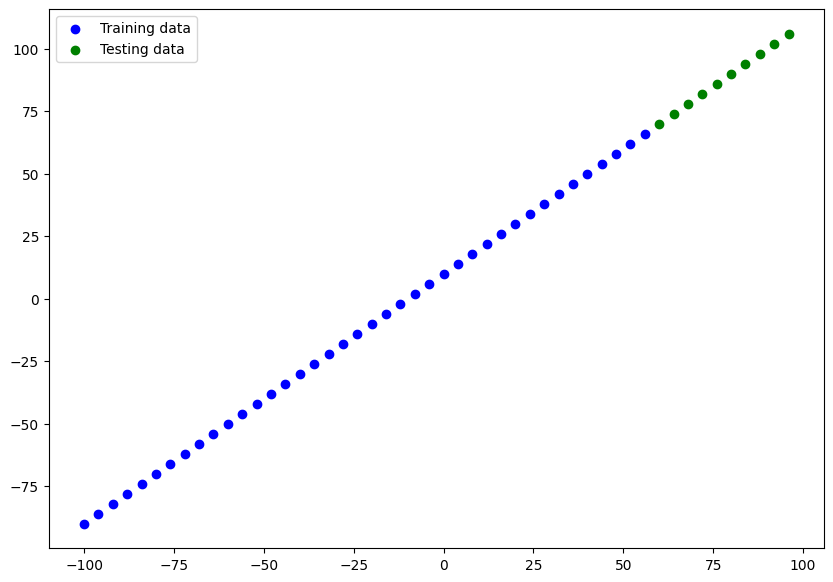

In [26]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data") # model learns on training data
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data") # moedl tested on testing data
# Show legend
plt.legend()

In [27]:
# 1. Create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit model
#model.fit(X_train, y_train, epochs=100) #Fit model only on training

### Visualizing the model

In [28]:
model.summary()

ValueError: ignored

In [29]:
# Create model which builds automatically by defining input_shape arg in first layer
tf.random.set_seed(42)

# 1. Create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]) # input_shape = 1 b/c both X[0] and y[0] are scalars w/ shape of [1] or 1 number
])

# 2. Compile model
model.compile(loss = tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [30]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


- Total params - total # of params in model
- Trainable params - params (patterns) model can update as it trains
- Non-trainable params - params aren't updated during training (typical when importing already learned patterns or params through **transfer learning**)

In [32]:
# Experimenting w/ # of hidden layers and trainable params/total params
tf.random.set_seed(42)

# 1. Create model
model = tf.keras.Sequential([
   tf.keras.layers.Dense(10, input_shape=[1], name = "input_layer"), #input_shape = 1 b/c both X[0] and y[0] are scalars w/ shape of [1] or 1 number
   tf.keras.layers.Dense(1, name="output_layer")
], name = "model_1")

# 2. Compile model
model.compile(loss = tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


For every hidden layer added there are 2 trainable params per layer b/c number of layers * 2 = total params

In [33]:
# Fitting original model to trianing
model.fit(X_train, y_train, epochs=100, verbose=2)

Epoch 1/100
2/2 - 0s - loss: 36.8477 - mae: 36.8477 - 285ms/epoch - 143ms/step
Epoch 2/100
2/2 - 0s - loss: 22.1848 - mae: 22.1848 - 9ms/epoch - 4ms/step
Epoch 3/100
2/2 - 0s - loss: 27.6054 - mae: 27.6054 - 6ms/epoch - 3ms/step
Epoch 4/100
2/2 - 0s - loss: 13.4294 - mae: 13.4294 - 6ms/epoch - 3ms/step
Epoch 5/100
2/2 - 0s - loss: 17.9961 - mae: 17.9961 - 5ms/epoch - 3ms/step
Epoch 6/100
2/2 - 0s - loss: 8.5350 - mae: 8.5350 - 6ms/epoch - 3ms/step
Epoch 7/100
2/2 - 0s - loss: 12.3053 - mae: 12.3053 - 6ms/epoch - 3ms/step
Epoch 8/100
2/2 - 0s - loss: 10.9453 - mae: 10.9453 - 10ms/epoch - 5ms/step
Epoch 9/100
2/2 - 0s - loss: 38.6786 - mae: 38.6786 - 5ms/epoch - 3ms/step
Epoch 10/100
2/2 - 0s - loss: 26.3062 - mae: 26.3062 - 5ms/epoch - 3ms/step
Epoch 11/100
2/2 - 0s - loss: 11.8113 - mae: 11.8113 - 5ms/epoch - 3ms/step
Epoch 12/100
2/2 - 0s - loss: 23.6843 - mae: 23.6843 - 5ms/epoch - 3ms/step
Epoch 13/100
2/2 - 0s - loss: 21.0172 - mae: 21.0172 - 6ms/epoch - 3ms/step
Epoch 14/100
2/2 -

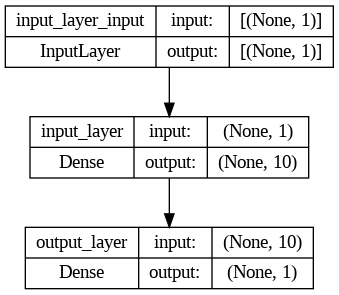

In [34]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

In [35]:
# Get summary of model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


### More model visualization and experimentation

In [36]:
# Experimenting w/ # of hidden layers and trainable params/total params
tf.random.set_seed(42)

# 1. Create model
model = tf.keras.Sequential([
   tf.keras.layers.Dense(10, input_shape=[1], name = "input_layer"), #input_shape = 1 b/c both X[0] and y[0] are scalars w/ shape of [1] or 1 number
   tf.keras.layers.Dense(100, name="hidden_layer1"),
   tf.keras.layers.Dense(10, name="hidden_layer2"),
   tf.keras.layers.Dense(1, name="output_layer1")
], name = "model_2")

# 2. Compile model
model.compile(loss = tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 hidden_layer1 (Dense)       (None, 100)               1100      
                                                                 
 hidden_layer2 (Dense)       (None, 10)                1010      
                                                                 
 output_layer1 (Dense)       (None, 1)                 11        
                                                                 
Total params: 2,141
Trainable params: 2,141
Non-trainable params: 0
_________________________________________________________________


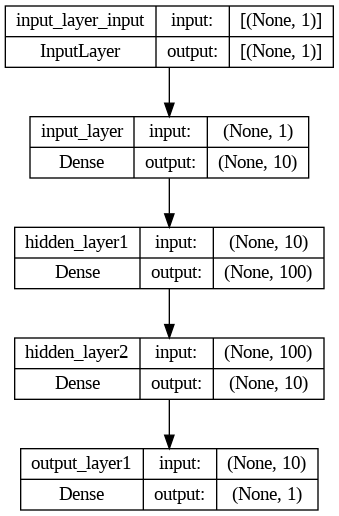

In [37]:
plot_model(model=model, show_shapes=True)

### Visualizing model predictions

(Predictions from the original model from cell 75)

To visualize predictions: plot predictions vs actual values.

'y_test' or 'y_pred' vs 'y_pred' (actual vs model predictions)

In [38]:
# Making predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 47ms/step


array([[-26.178131],
       [-27.923338],
       [-29.66855 ],
       [-31.413757],
       [-33.158962],
       [-34.904175],
       [-36.649387],
       [-38.39459 ],
       [-40.139793],
       [-41.88501 ]], dtype=float32)

In [39]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [40]:
# Creating plot function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):

  """ 
  Plots training data, test data and compares predictions to actual value
  """
  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show legend
  plt.legend()

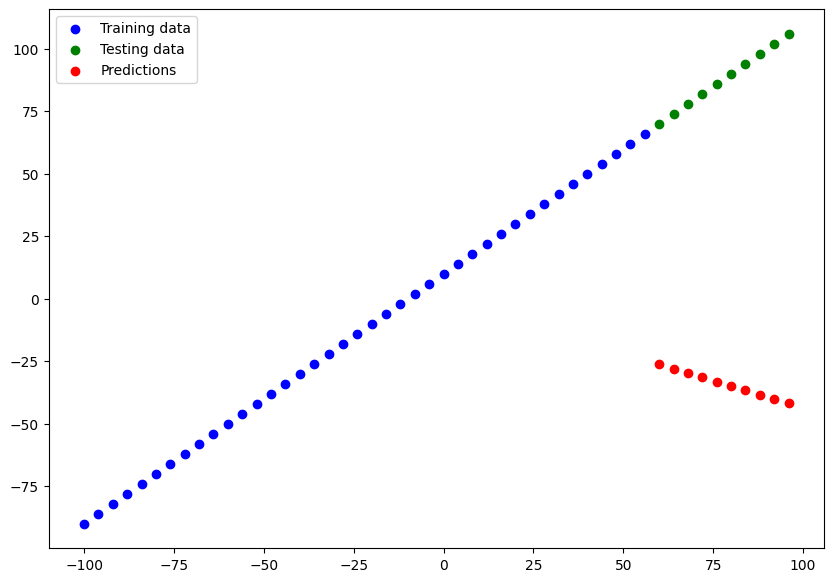

In [41]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred
                 )

### Evaluating model's predictions w/ regression evaluation metrics

Depending on problem, there will be diff evaluation metrics to evaluate model's performance. 

Current problem: regression problem, therefore 2 of the main metrics are:
- MAE - mean absolute error, "On avg how wrong is each model's prediction"
- MSE - mean square error, "square avg errors" (when larger errors are more significant than smaller errors)
- Huber - combination of MSE and MAE (less sensitive to outliers than MSE)

In [42]:
# Evaluate model on test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 171ms/step - loss: 122.0316 - mae: 122.0316


[122.03157043457031, 122.03157043457031]

In [43]:
y_pred

array([[-26.178131],
       [-27.923338],
       [-29.66855 ],
       [-31.413757],
       [-33.158962],
       [-34.904175],
       [-36.649387],
       [-38.39459 ],
       [-40.139793],
       [-41.88501 ]], dtype=float32)

In [44]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [45]:
# Calculate mean absolute error
mae = tf.keras.losses.MAE(y_true=y_test, y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([114.17812 , 115.92334 , 117.66856 , 119.41376 , 121.15896 ,
       122.904175, 124.64939 , 126.39459 , 128.1398  , 129.88501 ],
      dtype=float32)>

Doesn't seem to be working right b/c it isn't outputting the same value as above in the evaluate model call (cell 99)

In [46]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[-26.178131],
       [-27.923338],
       [-29.66855 ],
       [-31.413757],
       [-33.158962],
       [-34.904175],
       [-36.649387],
       [-38.39459 ],
       [-40.139793],
       [-41.88501 ]], dtype=float32)>

In [47]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Shape of y_test and y_pred tensor isn't equal therefore that is messing w/ calculating the MAE**

In [48]:
# Squeeze shape of y_pred tensor to get its shape to be same as y_test tensor
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([-26.178131, -27.923338, -29.66855 , -31.413757, -33.158962,
       -34.904175, -36.649387, -38.39459 , -40.139793, -41.88501 ],
      dtype=float32)>

In [49]:
# Calculate mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=122.03157>

In [50]:
# Calculate mean square error
mse = tf.keras.losses.MSE(y_true=y_test, y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=15164.016>

In [51]:
# Make functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))

### Running experiments to improve model

How to improve model:
1. Get more data - more examples for model to train on (more opportunities to learn patterns or relationships b/w features and labels).
2. Make model larger (using a more complex model) - more layers or more hidden units per layer.
3. Train longer - give model more time/data to find patterns in data.

3 modelling experiments that are done in section below:
1. 'model_1' - same as original model, 1 layer, trained for 100 epochs.
2. 'model_2' - 2 layers, trained for 100 epochs
3. 'model_3' - 2 layers, trained for 500 epochs
4. 'model_4' - 
5. 'model_5' - 

In [52]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [53]:
# Set random seed for reproducibility
tf.random.set_seed(42)

# 1. Create model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit model
model_1.fit(tf.expand_dims(X_train, -1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 10ms/step - loss: 91.3948 - mae: 91.3948
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 55.9393 - mae: 55.9393
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 19.5008 - mae: 19.5008
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 9.8562 - mae: 9.8562
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 10.8048 - mae: 10.8048
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 9.9948 - mae: 9.9948
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 9.0458 - mae: 9.0458
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 9.1091 - mae: 9.1091
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 19.8933 - mae: 19.8933
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 10.7678 - mae: 10.7678
Epoch 11/100
2/2 [==============================] - 0s 3ms/step -

1/1 [==============================] - 0s 38ms/step


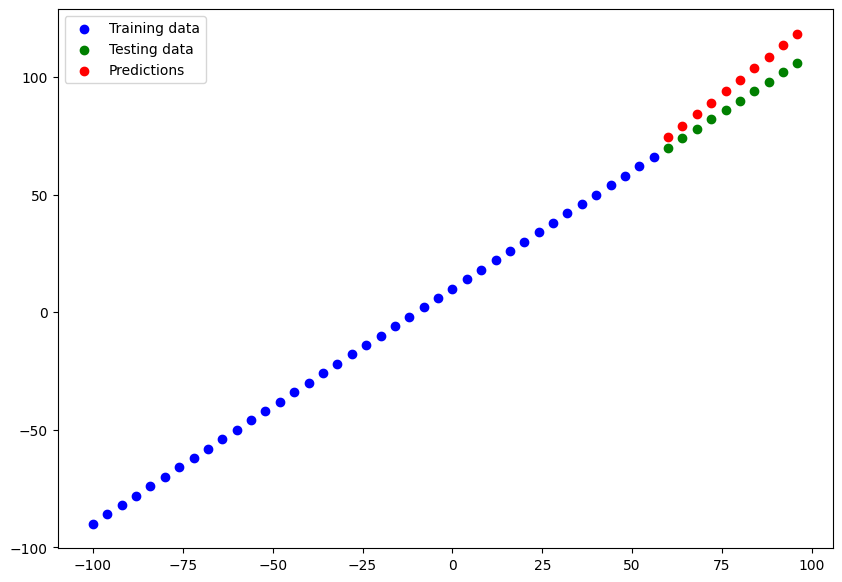

In [54]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [55]:
# Calculate mode_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=8.452595>,
 <tf.Tensor: shape=(), dtype=float32, numpy=77.84221>)

**model_2**

- 2 dense layers created for 100 epochs

In [56]:
# Set random seed
tf.random.set_seed(42)

# 1. Create model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit model
model_2.fit(tf.expand_dims(X_train, -1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 44.1973 - mse: 2996.5525
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 26.0712 - mse: 877.4839
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 31.4708 - mse: 1475.1082
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 26.5806 - mse: 1033.3068
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 14.5510 - mse: 262.2198
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 11.5962 - mse: 155.7110
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 12.6465 - mse: 214.7515
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 11.0185 - mse: 150.5225
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 39.6383 - mse: 2462.8276
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 27.1405 - mse: 1036.3636
Epoch 11/100
2/2 [==========================

1/1 [==============================] - 0s 41ms/step


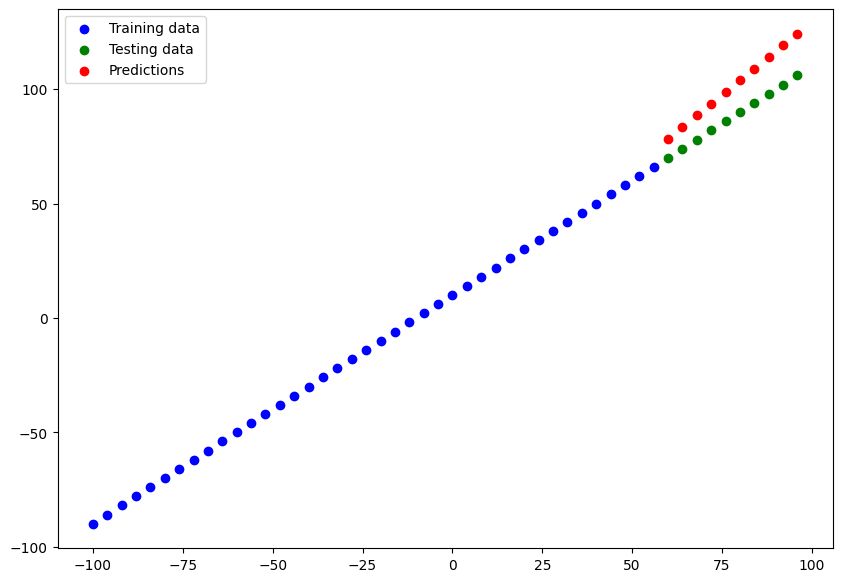

In [57]:
# Make and plot predictions
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [58]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=13.26853>,
 <tf.Tensor: shape=(), dtype=float32, numpy=186.08098>)

**'model_3'**

In [59]:
# Set random seed
tf.random.set_seed(42)

# 1. Create model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit model
model_3.fit(tf.expand_dims(X_train, -1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 9ms/step - loss: 64.5796 - mae: 64.5796
Epoch 2/500
2/2 [==============================] - 0s 5ms/step - loss: 32.4804 - mae: 32.4804
Epoch 3/500
2/2 [==============================] - 0s 5ms/step - loss: 35.3893 - mae: 35.3893
Epoch 4/500
2/2 [==============================] - 0s 5ms/step - loss: 18.2197 - mae: 18.2197
Epoch 5/500
2/2 [==============================] - 0s 5ms/step - loss: 23.8780 - mae: 23.8780
Epoch 6/500
2/2 [==============================] - 0s 4ms/step - loss: 11.4418 - mae: 11.4418
Epoch 7/500
2/2 [==============================] - 0s 4ms/step - loss: 12.5598 - mae: 12.5598
Epoch 8/500
2/2 [==============================] - 0s 4ms/step - loss: 11.1160 - mae: 11.1160
Epoch 9/500
2/2 [==============================] - 0s 4ms/step - loss: 40.1411 - mae: 40.1411
Epoch 10/500
2/2 [==============================] - 0s 4ms/step - loss: 27.5820 - mae: 27.5820
Epoch 11/500
2/2 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 56ms/step


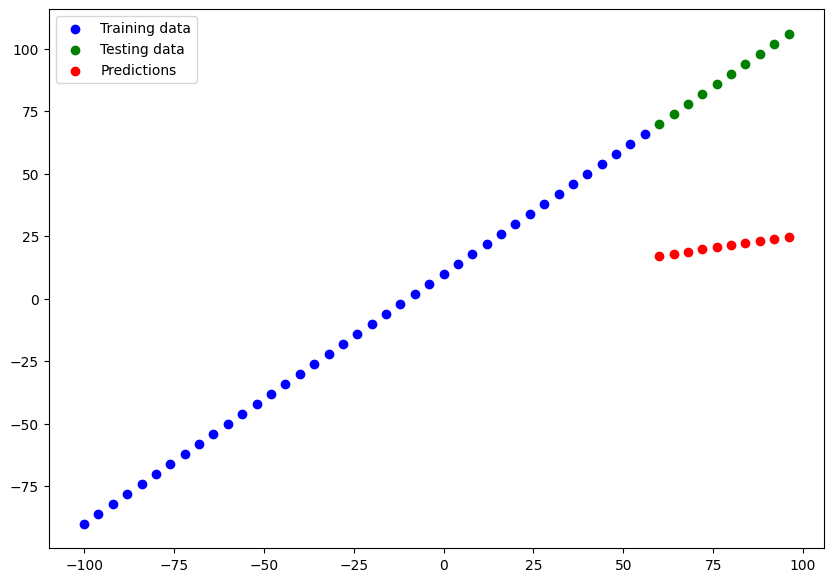

In [60]:
# Make and plot predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [61]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=66.992744>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4570.457>)

**model_4**

- 3 dense layers created for 100 epochs

In [62]:
# Set random seed
tf.random.set_seed(42)

# 1. Create model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit model
model_4.fit(tf.expand_dims(X_train, -1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 9ms/step - loss: 59.7603 - mae: 59.7603
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 31.2761 - mae: 31.2761
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 22.1455 - mae: 22.1455
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 18.1167 - mae: 18.1167
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 16.5096 - mae: 16.5096
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 26.4124 - mae: 26.4124
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 15.2522 - mae: 15.2522
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 12.0876 - mae: 12.0876
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 47.1996 - mae: 47.1996
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 18.0913 - mae: 18.0913
Epoch 11/100
2/2 [==============================] - 0s 6ms

1/1 [==============================] - 0s 396ms/step


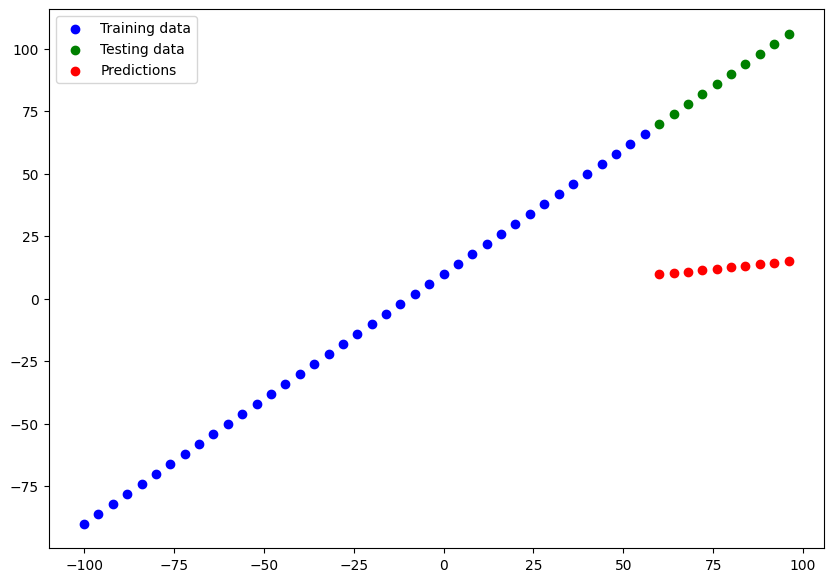

In [63]:
# Make and plot predictions
y_preds_4 = model_4.predict(X_test)
plot_predictions(predictions=y_preds_4)

In [64]:
# Calculate model_4 evaluation metrics
mae_4 = mae(y_test, y_preds_4)
mse_4 = mse(y_test, y_preds_4)
mae_4, mse_4

(<tf.Tensor: shape=(), dtype=float32, numpy=75.63994>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5817.6704>)

**model_5**
2 dense layers for 100 epochs but w/ Adam optimization lr=0.0001

In [65]:
# Set random seed
tf.random.set_seed(42)

# 1. Create model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model_5.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["mae"])

# 3. Fit model
model_5.fit(tf.expand_dims(X_train, -1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 14ms/step - loss: 10.5804 - mae: 10.5804
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 10.0592 - mae: 10.0592
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 9.5424 - mae: 9.5424
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0713 - mae: 9.0713
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 8.6570 - mae: 8.6570
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 8.2820 - mae: 8.2820
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 7.9845 - mae: 7.9845
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 7.7050 - mae: 7.7050
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 7.5794 - mae: 7.5794
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 7.5244 - mae: 7.5244
Epoch 11/100
2/2 [==============================] - 0s 4ms/step - loss: 7.

1/1 [==============================] - 0s 70ms/step


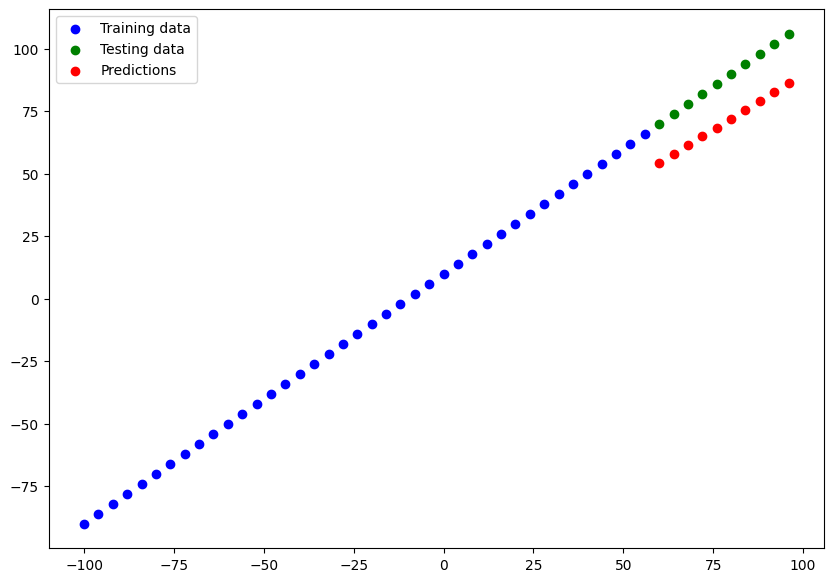

In [66]:
# Make and plot predictions for model_5
y_preds_5 = model_5.predict(X_test)
plot_predictions(predictions=y_preds_5)

In [67]:
# Calculate model_4 evaluation metrics
mae_5 = mae(y_test, y_preds_5)
mse_5 = mse(y_test, y_preds_5)
mae_5, mse_5

(<tf.Tensor: shape=(), dtype=float32, numpy=17.747208>,
 <tf.Tensor: shape=(), dtype=float32, numpy=316.6194>)

## Comparing results of experiments

In [68]:
# Compare model's results using pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()],
                 ["model_4", mae_4.numpy(), mse_4.numpy()],
                 ["model_5", mae_5.numpy(), mse_5.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,8.452595,77.842209
1,model_2,13.268530,186.080978
2,model_3,66.992744,4570.457031
3,model_4,75.639938,5817.670410
4,model_5,17.747208,316.619385


model_2 performs the best

In [69]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


### Saving Models

Saving models enables models to be used outside of colab notebooks elsewhere

2 main formats to save model to:
- SavedModel format
- HDF5 format 

In [70]:
# Save model w/ SavedModel format
model_2.save("best_model_SavedModel_format")

In [71]:
# Save model using HDF5 format
model_2.save("best_model_HDF5_format.h5")

## Loading in a saved model

In [72]:
# Load in a SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [73]:
# Compare model_2 predictions w/ savedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 39ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [74]:
# Compared mae of loaded model and model_2
mae(y_true=y_test, y_pred=model_2_preds) == mae(y_true=y_test, y_pred=loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [75]:
# Load in a model using .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [76]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [77]:
# Compare predictions w/ model_2 and loaded h5 model
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 39ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## A larger Example


In [78]:
# Import libs
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [79]:
# Read in insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [81]:
# One hot encoding dataframe so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [82]:
# Creating X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [83]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [85]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [88]:
# Creating training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [92]:
# Build neural network like model_2
tf.random.set_seed(42)

# 1. Create model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 8582.7939 - mae: 8582.7939
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7882.8374 - mae: 7882.8374
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7584.8818 - mae: 7584.8818
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7677.4800 - mae: 7677.4800
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7673.8394 - mae: 7673.8394
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7538.1958 - mae: 7538.1958
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7515.3081 - mae: 7515.3081
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7693.0410 - mae: 7693.0410
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7491.2378 - mae: 7491.2378
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7684.4653 - mae: 7684.4653

In [93]:
 insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 8718.5215 - mae: 8718.5215


[8718.521484375, 8718.521484375]

In [95]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

### Improving the Model

1. Add extra layer w/ more hidden units and used Adam optimizer
2. Train for longer



In [108]:
# Set random seed
tf.random.set_seed(42)

# 1. Create model w/ more layers
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 1ms/step - loss: 13321.3750 - mae: 13321.3750
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 13218.6592 - mae: 13218.6592
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 12973.8027 - mae: 12973.8027
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 12453.0342 - mae: 12453.0342
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 11505.9795 - mae: 11505.9795
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 10122.0566 - mae: 10122.0566
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 8643.8438 - mae: 8643.8438
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7681.3750 - mae: 7681.3750
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7448.4707 - mae: 7448.4707
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7421.3755 - ma

In [109]:
# Evaluate model2
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 5122.6821 - mae: 5122.6821


[5122.68212890625, 5122.68212890625]

In [124]:
# Set random seed
tf.random.set_seed(42)

# 1. Create model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit model
history = insurance_model_3.fit(X_test, y_test, epochs=500, verbose=0)

In [125]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3598.4863 - mae: 3598.4863


[3598.486328125, 3598.486328125]

In [126]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8718.5215 - mae: 8718.5215


[8718.521484375, 8718.521484375]

Text(0.5, 0, 'epochs')

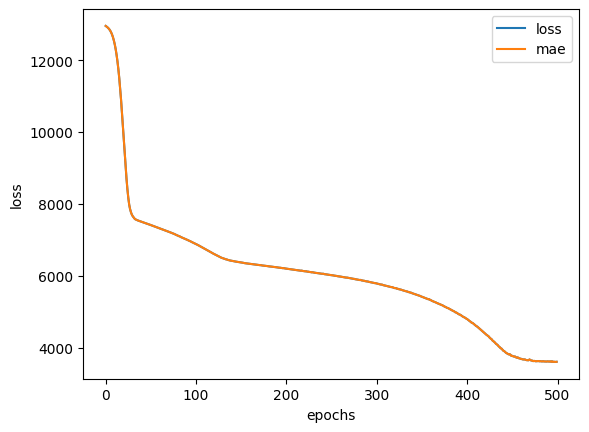

In [127]:
# Plot history (also known as loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Preprocessing data (normalization and standardization)

In terms or scalaing values, neural networks tend to prefer normalization

try both and see which performs better

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare data use Scikit-Learn

In [137]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in columns b/w 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X and y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer to training data
ct.fit(X_train)

# Transform training and test data w/ normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test) 

In [138]:
# How data looks
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [142]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [143]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Train a new neural network model on the normalized data

In [ ]:
# Build neural network model to fit normalized data

<Axes: ylabel='Frequency'>

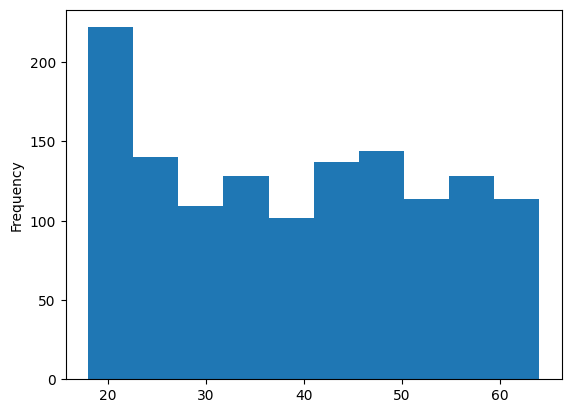

In [130]:
X["age"].plot(kind="hist")
# range roughly from 20 to 60

<Axes: ylabel='Frequency'>

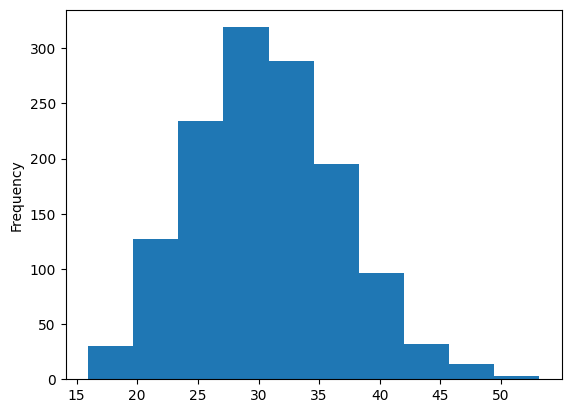

In [131]:
X["bmi"].plot(kind="hist")
# range from roughly 15 to 55

In [132]:
X["children"].value_counts()
# range from 0 to 5

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

Goal of normalization is to get the above value ranges on a similar scale w/o distorting the differences in range of values.
Ex: Get all the above values only b/w 0 and 1 w/o changing differences or distribution